# Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [51]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [41]:
import numpy as np
from scipy import stats
from random import random
from collections import defaultdict
%matplotlib inline

## Demo 1: Import stimulus (color chip) information in [Munsell space](https://en.wikipedia.org/wiki/Munsell_color_system)

> Stimuli were 330 color chips in Munsell space, each defined along lightness and hue dimensions.

> Each color chip has an index _(from 1 to 330)_ and a coordinate (lightness *(alphabet)*, hue *(integer)*).

In the following section, you will learn how to convert from **(a) index to coordinate** and **(b) coordinate to index**.

______________________________________________

Load chip information in Munsell space. 

`munsellInfo` is a 2-element tuple with dictionary elements.

In [23]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')
#munsellInfo

### (a) Index &rarr; Coordinate

Access the second dictionary in `munsellInfo`.

In [4]:
indexCoord = munsellInfo[1]

`indexCoord` is a dictionary with **index _(key)_ &rarr; coordinate _(value)_** pairs. For example, to retrieve the Munsell coordinate _(lightness, hue)_ for chip with numerical index 1:

In [5]:
print(indexCoord[1])

('E', '29')


You can also uncomment the following to display full stimulus information (long).

In [9]:
# print(indexCoord)

### (b) Coordinate &rarr; Index

Access the first dictionary in `munsellInfo`.

In [7]:
coordIndex = munsellInfo[0]

`coordIndex` is a dictionary with **coordinate _(key)_ &rarr; index _(value)_** pairs. For example, to access numerical index for the color chip at Munsell coordinate _(D, 11)_:

In [8]:
print(coordIndex['D11'])

258


You can also uncomment the following to display full stimulus information (long).

In [122]:
# print(coordIndex)

## Demo 2: Import stimulus information in [CIELAB space](https://en.wikipedia.org/wiki/Lab_color_space)

> Each of the 330 stimuli can also be mapped to the 3D CIELAB space, where the dimensions are `l` _(lightness)_, `a`, & `b` _(color opponency)_.

> CIELAB Coordinates have a **one-to-one** correspondence with Munsell index, which ranges from 1 to 330.

______________________________________________

Load chip coordinates in CIELAB. 

`cielabCoord` is a dictionary with **index _(key)_ &rarr; CIELAB Coordinate _(value)_** pairs.

In [10]:
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

For example, to obtain the CIELAB coordinates for chip with numerical index 1:

In [11]:
print(cielabCoord[1])

('61.70', '-4.52', '-39.18')


## Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

______________________________________________

Load naming data. 

`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [12]:
namingData = readNamingData('./WCS_data_core/term.txt')

For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:

In [28]:
namingData[1][1]; # remove semicolon to see data in full

For example, to see how many speakers language 1 has:

In [26]:
len(namingData[1])

25

## Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used.

> **Note**: A single color term may have multiple foci locations.

______________________________________________

Load foci data. 

`fociData` is a hierarchical dictionary organized as follows: 

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; color term &rarr; foci coordinates**

In [15]:
fociData = readFociData('./WCS_data_core/foci-exp.txt');

For example, to obtain foci data for language 1 and speaker 1, where each entry shows foci locations for given term: 

In [16]:
fociData[1][1]

{'LF': ['A:0'],
 'WK': ['D:9', 'D:10', 'D:11', 'D:12'],
 'F': ['D:25'],
 'LB': ['J:0'],
 'G': ['F:17'],
 'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3']}

In the above example, foci for term 'LF' is located at coordinate _(A, 0)_ in the Munsell chart.

## Demo 5: Import speaker demographic information

> Most speakers' age _(integer)_ and gender _(M/F)_ information was recorded.

______________________________________________

Load speaker information.

`speakerInfo` is a hierarchical dictionary organized as follows:

**language &rarr; speaker &rarr; (age, gender)**

In [17]:
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

For example, uncomment the following line to access _(age, gender)_ information for all speakers from language 1:

In [131]:
# speakerInfo[1]

For example, uncomment the following line to access _(age, gender)_ information for speaker 1 from language 1:

In [132]:
# speakerInfo[1][1]

## Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette _(Munsell space)_.

______________________________________________

Extract an example speaker datum from an example language.

In [18]:
lg61_spk5 = namingData[61][5]

Extract color terms used by that speaker.

In [38]:
terms = lg61_spk5.values()
terms

dict_values(['LE', 'LE', 'WI', '*', 'LE', '*', 'LE', 'WI', '*', 'LE', 'LE', 'LE', 'LE', 'LE', 'RE', 'RE', 'WI', 'DU', 'LE', 'LE', 'WI', 'LE', 'DU', 'DU', 'LE', 'LE', 'RE', 'WI', 'LE', 'LE', 'RE', 'LE', 'LE', 'LE', 'WI', 'DU', 'LE', 'WI', 'LE', 'LE', 'WI', '*', 'LE', 'RE', 'LE', 'DU', 'DU', 'LE', 'LE', 'LE', 'DU', 'RE', 'WI', 'LE', 'LE', 'WI', 'LE', 'LE', 'RE', 'DU', 'WI', 'LE', 'LE', 'LE', 'WI', 'RE', 'LE', 'WI', 'LE', 'RE', 'WI', 'LE', 'WI', 'RE', 'DU', 'WI', 'LE', 'LE', 'DU', 'LE', 'LE', 'LE', 'RE', 'LE', 'LE', 'LE', 'DU', 'WI', 'DU', 'DU', 'LE', 'RE', 'LE', 'DU', 'RE', 'LE', 'LE', 'WI', 'LE', 'LE', 'WI', 'RE', 'DU', 'LE', 'WI', 'LE', 'RE', 'RE', 'LE', 'LE', 'DU', 'WI', 'DU', 'LE', 'WI', 'RE', 'DU', 'WI', 'LE', 'RE', 'WI', 'LE', 'LE', 'LE', 'WI', 'LE', 'DU', 'LE', 'RE', 'DU', 'WI', 'WI', 'LE', 'DU', 'WI', 'LE', 'LE', 'LE', 'RE', 'LE', 'RE', 'RE', 'LE', 'LE', 'LE', 'LE', 'LE', 'WI', 'LE', 'LE', 'LE', 'LE', 'LE', 'DU', 'DU', 'LE', 'DU', 'RE', 'LE', 'LE', 'LE', 'WI', 'LE', 'LE', 'DU', '

Encode the color terms into random numbers (for plotting purposes).

In [37]:
encoded_terms = map_array_to(terms, generate_random_values(terms))

Visualize the color naming pattern for that speaker&mdash;each color patch corresponds to extension of a color term. Color scheme is randomized, but the partition of the color space is invariant.

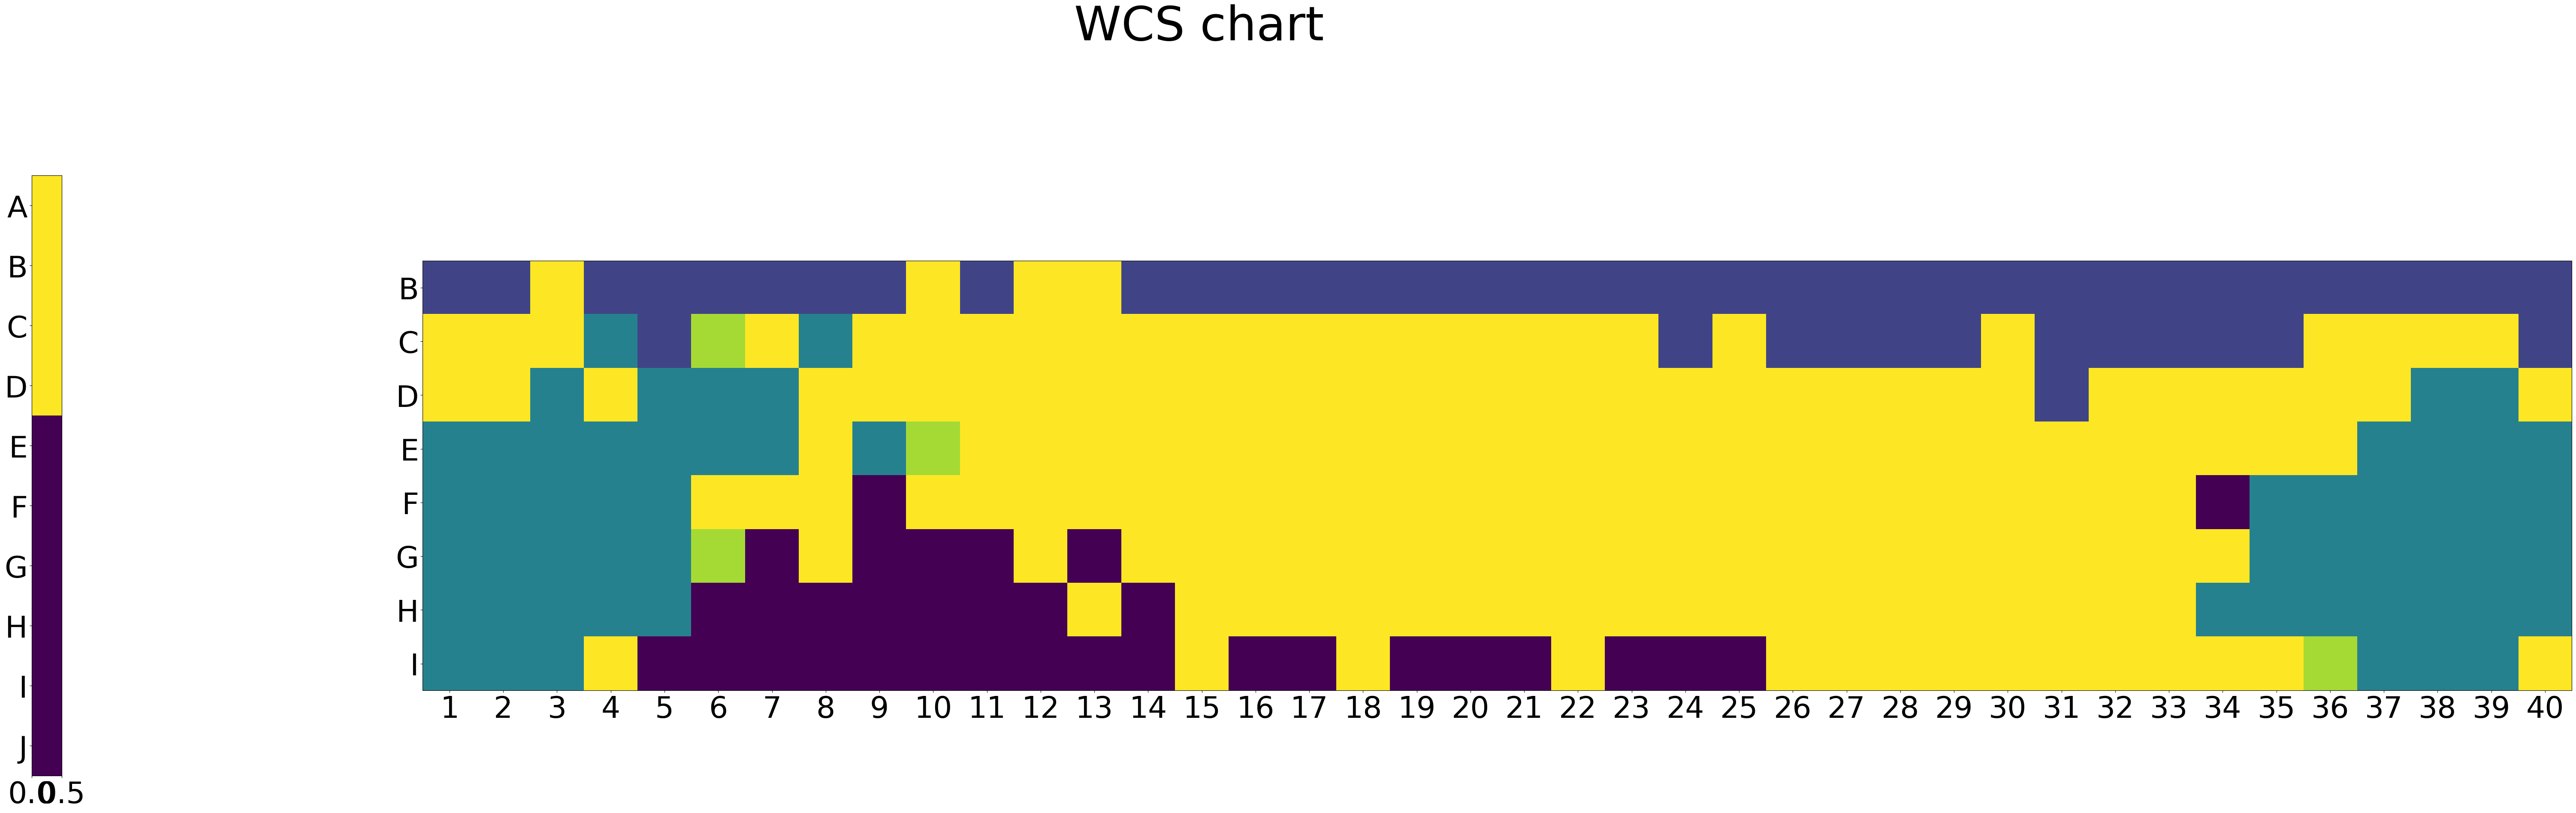

In [30]:
plotValues(encoded_terms)

**Note**: `plotValues()` is a generic function for visualizing various kinds of information on the chart, suited to needs.

Now you are in a position to start exploring this data set - enjoy!

# Our Analysis

## Empirical Color Foci

In [31]:
fociData

{1: {1: {'LF': ['A:0'],
   'WK': ['D:9', 'D:10', 'D:11', 'D:12'],
   'F': ['D:25'],
   'LB': ['J:0'],
   'G': ['F:17'],
   'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3']},
  2: {'LF': ['A:0'],
   'S': ['C:1', 'C:2', 'C:3', 'C:4', 'C:5'],
   'WK': ['E:1'],
   'LE': ['G:1', 'G:2'],
   'LB': ['J:0'],
   'G': ['I:29', 'I:30']},
  3: {'LF': ['A:0'],
   'LE': ['F:1', 'F:2', 'F:3'],
   'WK': ['E:3'],
   'S': ['D:12', 'I:5'],
   'F': ['B:20', 'B:21', 'B:22', 'B:23'],
   'LB': ['J:0']},
  4: {'LF': ['A:0'],
   'F': ['B:5'],
   'WK': ['E:5'],
   'LE': ['G:2'],
   'LB': ['J:0']},
  5: {'LF': ['A:0'],
   'WK': ['C:10'],
   'F': ['C:13'],
   'GB': ['D:13'],
   'LE': ['G:2'],
   'LB': ['G:27']},
  6: {'LF': ['A:0'],
   'WK': ['D:2', 'D:3', 'D:4', 'D:5'],
   'LE': ['G:1', 'G:2'],
   'LB': ['J:0'],
   'G': ['F:27', 'F:28'],
   'F': ['C:37', 'C:38', 'C:39']},
  7: {'LF': ['A:0'],
   'F': ['C:11'],
   'WK': ['B:12'],
   'G': ['F:29'],
   'LB': ['J:0'],
   'S': ['H:17'],
   'LE': ['I:1']},
  8: {'LF': 

In [33]:
fociByLanguage = {}
for language in fociData:
    speakerData = fociData[language]
    fociByLanguage[language] = {}
    for speaker in speakerData:
        foci = speakerData[speaker]
        for colorLabel in foci:
            if colorLabel not in fociByLanguage[language]:
                fociByLanguage[language][colorLabel] = []
            fociByLanguage[language][colorLabel] += foci[colorLabel]
fociByLanguage

{1: {'LF': ['A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'A:0',
   'B:0',
   'A:0'],
  'WK': ['D:9',
   'D:10',
   'D:11',
   'D:12',
   'E:1',
   'E:3',
   'E:5',
   'C:10',
   'D:2',
   'D:3',
   'D:4',
   'D:5',
   'B:12',
   'E:2',
   'C:11',
   'D:38',
   'C:1',
   'C:2',
   'C:3',
   'C:4',
   'C:5',
   'D:6',
   'D:7',
   'C:4',
   'C:5',
   'C:6',
   'E:38',
   'E:39',
   'E:40',
   'B:16',
   'D:8',
   'D:5',
   'F:6',
   'F:35',
   'F:7',
   'F:8',
   'E:1',
   'C:1',
   'C:6',
   'C:7',
   'C:3',
   'C:4'],
  'F': ['D:25',
   'B:20',
   'B:21',
   'B:22',
   'B:23',
   'B:5',
   'C:13',
   'C:37',
   'C:38',
   'C:39',
   'C:11',
   'B:12',
   'C:35',
   'D:31',
   'D:32',
   'D:33',
   'B:1',
   'B:2',
   'B:3',
   'B:4',
   'B:5',
   'B:6',
   'B:7',
   'C:1',
   'C:2',
   'C:3',
   'C:28',
   'C:29',

In [34]:
fociCountByLanguage = {}
for language in fociByLanguage:
    fociCountByLanguage[language] = {}
    for colorLabel in fociByLanguage[language]:
        fociCountByLanguage[language][colorLabel] = {}
        colorFoci = fociByLanguage[language][colorLabel]
        for focus in colorFoci:
            if focus not in fociCountByLanguage[language][colorLabel]:
                fociCountByLanguage[language][colorLabel][focus] = 0
            fociCountByLanguage[language][colorLabel][focus] += 1
fociCountByLanguage

{1: {'LF': {'A:0': 24, 'B:0': 1},
  'WK': {'D:9': 1,
   'D:10': 1,
   'D:11': 1,
   'D:12': 1,
   'E:1': 2,
   'E:3': 1,
   'E:5': 1,
   'C:10': 1,
   'D:2': 1,
   'D:3': 1,
   'D:4': 1,
   'D:5': 2,
   'B:12': 1,
   'E:2': 1,
   'C:11': 1,
   'D:38': 1,
   'C:1': 2,
   'C:2': 1,
   'C:3': 2,
   'C:4': 3,
   'C:5': 2,
   'D:6': 1,
   'D:7': 1,
   'C:6': 2,
   'E:38': 1,
   'E:39': 1,
   'E:40': 1,
   'B:16': 1,
   'D:8': 1,
   'F:6': 1,
   'F:35': 1,
   'F:7': 1,
   'F:8': 1,
   'C:7': 1},
  'F': {'D:25': 1,
   'B:20': 2,
   'B:21': 1,
   'B:22': 1,
   'B:23': 1,
   'B:5': 4,
   'C:13': 1,
   'C:37': 2,
   'C:38': 2,
   'C:39': 2,
   'C:11': 1,
   'B:12': 1,
   'C:35': 2,
   'D:31': 1,
   'D:32': 1,
   'D:33': 1,
   'B:1': 2,
   'B:2': 2,
   'B:3': 3,
   'B:4': 3,
   'B:6': 2,
   'B:7': 2,
   'C:1': 2,
   'C:2': 2,
   'C:3': 2,
   'C:28': 1,
   'C:29': 1,
   'C:30': 1,
   'B:8': 1,
   'B:9': 2,
   'C:4': 2,
   'C:5': 1,
   'C:36': 1,
   'C:40': 1,
   'C:20': 1,
   'D:12': 1,
   'E:12':

In [49]:
overallChipLabelAsBestExample = {ind: 0 for ind in indexCoord}
overallFociCount = {}
for language in fociCountByLanguage:
    for colorLabel in fociCountByLanguage[language]:
        if colorLabel not in overallFociCount:
            overallFociCount[colorLabel] = {}
        for focus in fociCountByLanguage[language][colorLabel]:
            if focus not in overallFociCount[colorLabel]:
                overallFociCount[colorLabel][focus] = 0
            overallFociCount[colorLabel][focus] += fociCountByLanguage[language][colorLabel][focus]
            #overallChipLabelAsBestExample[focus] += fociCountByLanguage[language][colorLabel][focus]
            overallChipLabelAsBestExample[coordIndex[focus.replace(':', '')]] += fociCountByLanguage[language][colorLabel][focus]
overallChipLabelAsBestExample

{1: 83,
 2: 22,
 3: 216,
 4: 63,
 5: 35,
 6: 67,
 7: 76,
 8: 69,
 9: 65,
 10: 95,
 11: 45,
 12: 286,
 13: 54,
 14: 48,
 15: 39,
 16: 66,
 17: 68,
 18: 59,
 19: 85,
 20: 157,
 21: 78,
 22: 117,
 23: 44,
 24: 39,
 25: 26,
 26: 159,
 27: 82,
 28: 66,
 29: 58,
 30: 33,
 31: 24,
 32: 28,
 33: 57,
 34: 174,
 35: 56,
 36: 55,
 37: 44,
 38: 83,
 39: 39,
 40: 58,
 41: 143,
 42: 31,
 43: 76,
 44: 87,
 45: 117,
 46: 160,
 47: 48,
 48: 37,
 49: 41,
 50: 59,
 51: 79,
 52: 63,
 53: 58,
 54: 24,
 55: 48,
 56: 81,
 57: 22,
 58: 32,
 59: 24,
 60: 41,
 61: 140,
 62: 27,
 63: 75,
 64: 178,
 65: 131,
 66: 73,
 67: 32,
 68: 35,
 69: 21,
 70: 27,
 71: 102,
 72: 119,
 73: 95,
 74: 34,
 75: 48,
 76: 37,
 77: 40,
 78: 36,
 79: 91,
 80: 184,
 81: 26,
 82: 34,
 83: 71,
 84: 88,
 85: 156,
 86: 39,
 87: 55,
 88: 44,
 89: 2359,
 90: 46,
 91: 40,
 92: 74,
 93: 57,
 94: 75,
 95: 71,
 96: 351,
 97: 85,
 98: 665,
 99: 15,
 100: 27,
 101: 61,
 102: 16,
 103: 26,
 104: 42,
 105: 40,
 106: 132,
 107: 74,
 108: 80,
 109: 6

In [55]:
import importlib
import wcs_helper_functions
importlib.reload(wcs_helper_functions)
from wcs_helper_functions import *

In [57]:
normalizedOverallChipLabelAsBestExample = normalize_dict_values(overallChipLabelAsBestExample)
normalizedOverallChipLabelAsBestExample

{1: 0.028654485049833887,
 2: 0.0033222591362126247,
 3: 0.08388704318936877,
 4: 0.020348837209302327,
 5: 0.00872093023255814,
 6: 0.022009966777408636,
 7: 0.02574750830564784,
 8: 0.022840531561461794,
 9: 0.02117940199335548,
 10: 0.03363787375415282,
 11: 0.01287375415282392,
 12: 0.11295681063122924,
 13: 0.016611295681063124,
 14: 0.014119601328903655,
 15: 0.010382059800664452,
 16: 0.02159468438538206,
 17: 0.022425249169435217,
 18: 0.018687707641196014,
 19: 0.029485049833887042,
 20: 0.059385382059800665,
 21: 0.026578073089700997,
 22: 0.042774086378737544,
 23: 0.012458471760797342,
 24: 0.010382059800664452,
 25: 0.0049833887043189366,
 26: 0.06021594684385382,
 27: 0.02823920265780731,
 28: 0.02159468438538206,
 29: 0.018272425249169437,
 30: 0.007890365448504983,
 31: 0.004152823920265781,
 32: 0.005813953488372093,
 33: 0.017857142857142856,
 34: 0.0664451827242525,
 35: 0.01744186046511628,
 36: 0.0170265780730897,
 37: 0.012458471760797342,
 38: 0.02865448504983388

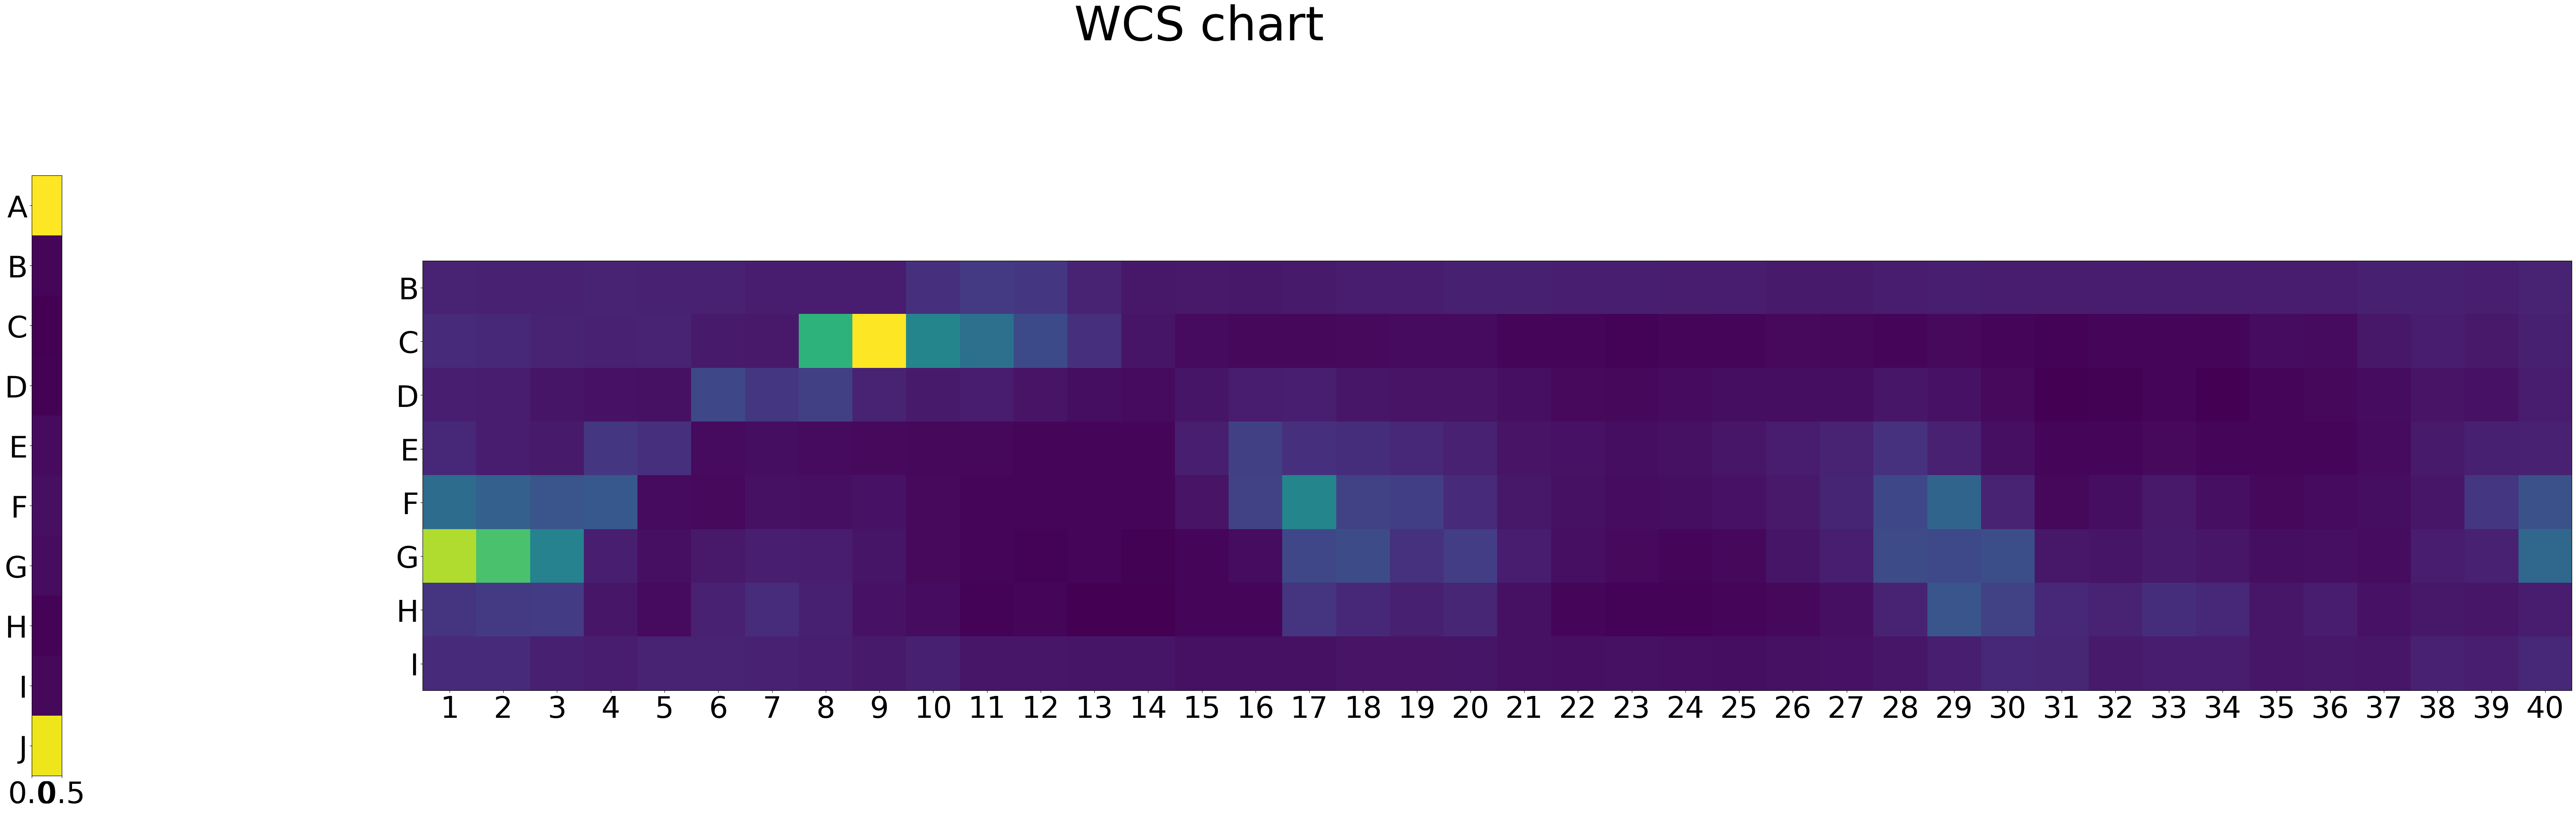

In [58]:
plotValues(map_array_to(indexCoord, normalizedOverallChipLabelAsBestExample))